In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
stock_data=pd.read_csv("/content/drive/MyDrive/CS_PROJECT/infy_stock.csv")

In [ ]:
stock_data.shape

(6501, 7)

In [ ]:
stock_data.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1040,1999-12-27,98.437500,100.773438,94.539063,98.292580,68.961334,6448640.0
4990,2015-09-01,545.000000,557.299988,541.000000,544.500000,465.566650,9071550.0
5401,2017-05-09,475.299988,475.975006,471.049988,473.325012,417.618500,5649372.0
5532,2017-11-15,472.575012,476.750000,472.250000,475.899994,432.278809,7023516.0
3019,2007-09-11,235.750000,235.750000,226.875000,227.850006,170.914612,7806928.0
2717,2006-06-26,187.437500,187.437500,180.625000,181.262497,135.186798,10961984.0
3789,2010-10-26,377.500000,380.412506,375.337494,376.731262,298.177551,6925872.0
4648,2014-04-11,401.250000,406.950012,395.625000,404.393738,333.418365,18678336.0
3509,2009-09-09,275.637512,277.312500,272.125000,273.712494,212.271484,7556600.0
5184,2016-06-20,590.500000,605.900024,589.849976,604.375000,527.586609,6229566.0


In [ ]:
print(stock_data.isnull().sum())

Date          0
Open         14
High         14
Low          14
Close        14
Adj Close    14
Volume       14
dtype: int64


In [ ]:
numerical_cols = stock_data.select_dtypes(include='number').columns
numerical_cols = numerical_cols.drop('Date_column', errors='ignore')

stock_data[numerical_cols] = stock_data[numerical_cols].fillna(stock_data[numerical_cols].mean())

In [ ]:
print(stock_data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

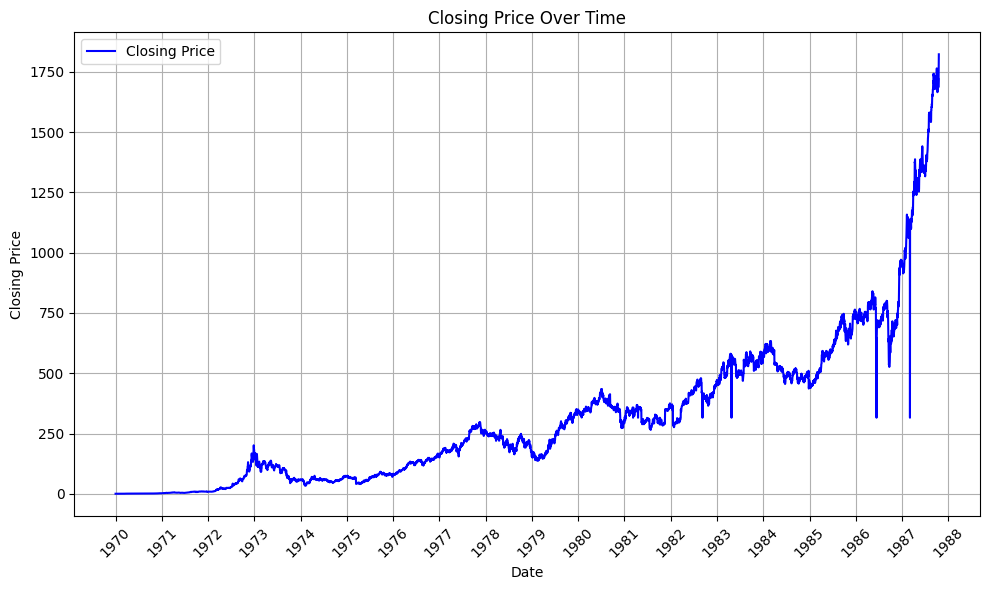

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the 'Closing Price' against 'Date'
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue')

# Add title and axis labels
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Customize the x-axis to display dates year-wise
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Display major ticks at yearly intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format to show only the year

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid and legend
plt.grid(True)
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
!pip install mplfinance




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.3 MB/s eta 0:00:00


         Date      Open      High       Low     Close  Adj Close    Volume
0  1996-01-01  0.794921  0.796679  0.791015  0.796679   0.549483  204800.0
1  1996-01-02  0.794921  0.798828  0.793457  0.793457   0.547260  204800.0
2  1996-01-03  0.798828  0.798828  0.798828  0.798828   0.550965  102400.0
3  1996-01-04  0.791015  0.794921  0.791015  0.793554   0.547327  307200.0
4  1996-01-05  0.784179  0.784179  0.784179  0.784179   0.540861   51200.0
0    1996-01-01
1    1996-01-02
2    1996-01-03
3    1996-01-04
4    1996-01-05
5    1996-01-08
6    1996-01-09
7    1996-01-10
8    1996-01-11
9    1996-01-12
Name: Date, dtype: object
NaT entries in Date: 0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6501 entries, 1996-01-01 to 2021-10-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6487 non-null   float64
 1   High       6487 non-null   float64
 2   Low        6487 non-null   float64
 3   Close      6

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


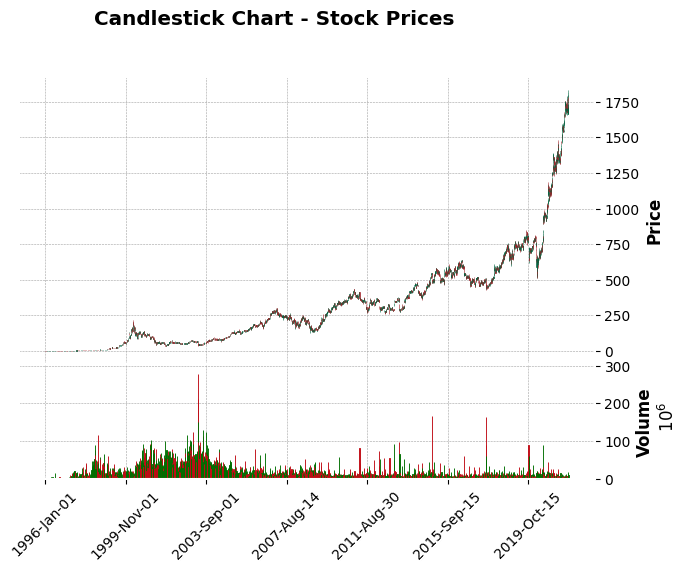

In [ ]:
import pandas as pd
import mplfinance as mpf

# Load your dataset (replace with your actual file path)
stock_data = pd.read_csv("/content/drive/MyDrive/CS_PROJECT/infy_stock.csv")

# Display the first few rows of the dataframe to understand the date format
print(stock_data.head())
print(stock_data['Date'].head(10))  # Check the first few dates

# Assuming the 'Date' column is in the format 'YYYY-MM-DD' (adjust as needed)
# Convert the 'Date' column to datetime format (change format if needed)
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d', errors='coerce')

# Check for NaT (Not a Time) entries after conversion
print(f"NaT entries in Date: {stock_data['Date'].isna().sum()}")
stock_data.dropna(subset=['Date'], inplace=True)

# Set the 'Date' column as the DataFrame index
stock_data.set_index('Date', inplace=True)

# Check DataFrame info after processing
print(stock_data.info())
print(stock_data.head())  # Display updated DataFrame

# Ensure that the required columns are present and of the correct type
required_columns = ['Open', 'High', 'Low', 'Close']
for col in required_columns:
    if col not in stock_data.columns:
        print(f"Error: Column '{col}' not found in the dataset.")
    else:
        stock_data[col] = pd.to_numeric(stock_data[col], errors='coerce')

# Print the DataFrame types after conversion
print(stock_data[required_columns].dtypes)

# Now you can plot the candlestick chart using mplfinance
mpf.plot(stock_data, type='candle', style='charles', volume=True,
         title='Candlestick Chart - Stock Prices', ylabel='Price',
         ylabel_lower='Volume')


In [ ]:
# Calculate the daily return percentage
stock_data['Daily_Return_Percentage'] = ((stock_data['Close'] - stock_data['Open']) / stock_data['Open']) * 100

# Reset the index to access 'Date' as a column
stock_data = stock_data.reset_index()

# Display the updated DataFrame
stock_data[['Date', 'Open', 'Close', 'Daily_Return_Percentage']].head()

,Date,Open,Close,Daily_Return_Percentage
0,1996-01-01,0.794921,0.796679,0.221154
1,1996-01-02,0.794921,0.793457,-0.184169
2,1996-01-03,0.798828,0.798828,0.000000
3,1996-01-04,0.791015,0.793554,0.320980
4,1996-01-05,0.784179,0.784179,0.000000


In [ ]:
# Calculate the average and median of daily returns
average_daily_return = stock_data['Daily_Return_Percentage'].mean()
median_daily_return = stock_data['Daily_Return_Percentage'].median()

print(f"Average Daily Return: {average_daily_return:.2f}%")
print(f"Median Daily Return: {median_daily_return:.2f}%")


Average Daily Return: 0.03%
Median Daily Return: 0.00%


In [ ]:
# Calculate the standard deviation of closing prices
std_dev_closing_price = stock_data['Close'].std()

print(f"Standard Deviation of Closing Prices: {std_dev_closing_price:.2f}")


Standard Deviation of Closing Prices: 317.49


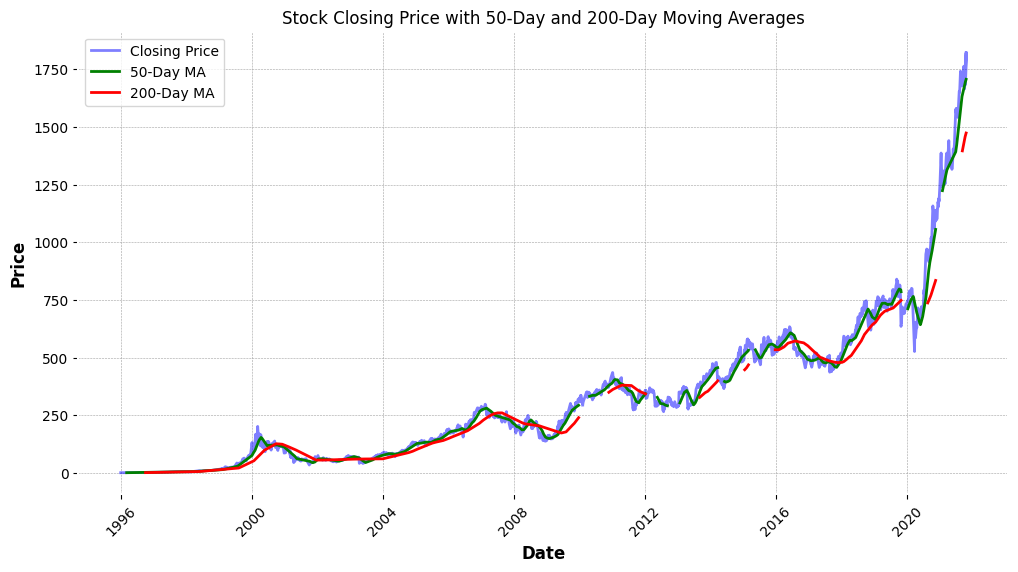

In [ ]:
# Step 2: Calculate the 50-day and 200-day moving averages
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200_MA'] = stock_data['Close'].rolling(window=200).mean()

# Step 3: Plot the Closing Prices along with 50-Day and 200-Day Moving Averages
plt.figure(figsize=(12,6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(stock_data['Date'], stock_data['50_MA'], label='50-Day MA', color='green')
plt.plot(stock_data['Date'], stock_data['200_MA'], label='200-Day MA', color='red')

# Add labels and title
plt.title('Stock Closing Price with 50-Day and 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

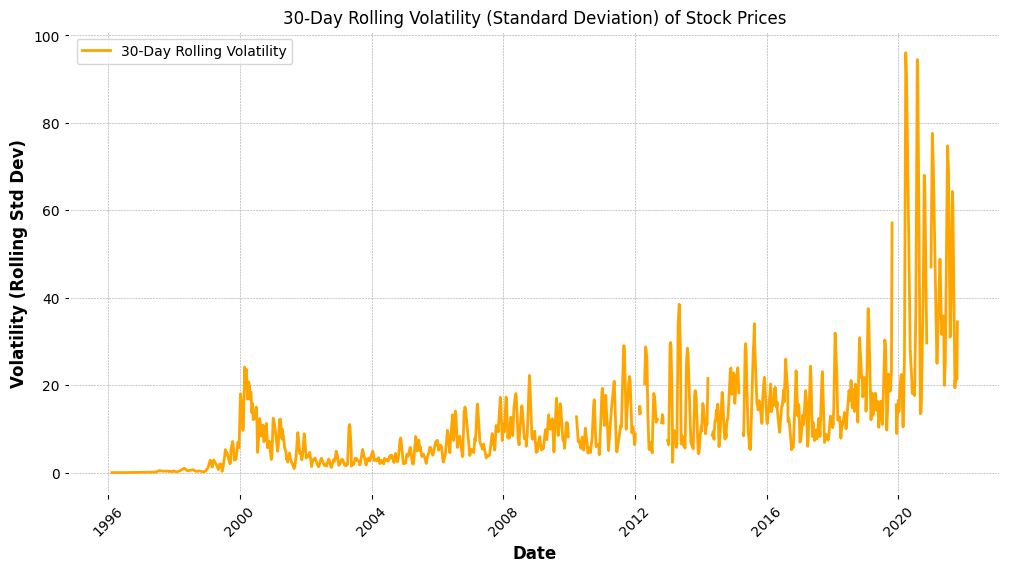

In [ ]:
# Ensure that 'Date' is parsed as a datetime object for better plotting
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Step 2: Calculate the 30-day rolling standard deviation (volatility)
stock_data['30_day_volatility'] = stock_data['Close'].rolling(window=30).std()

# Step 3: Plot the 30-day rolling standard deviation
plt.figure(figsize=(12,6))
plt.plot(stock_data['Date'], stock_data['30_day_volatility'], label='30-Day Rolling Volatility', color='orange')

# Add labels and title
plt.title('30-Day Rolling Volatility (Standard Deviation) of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Volatility (Rolling Std Dev)')
plt.legend()

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

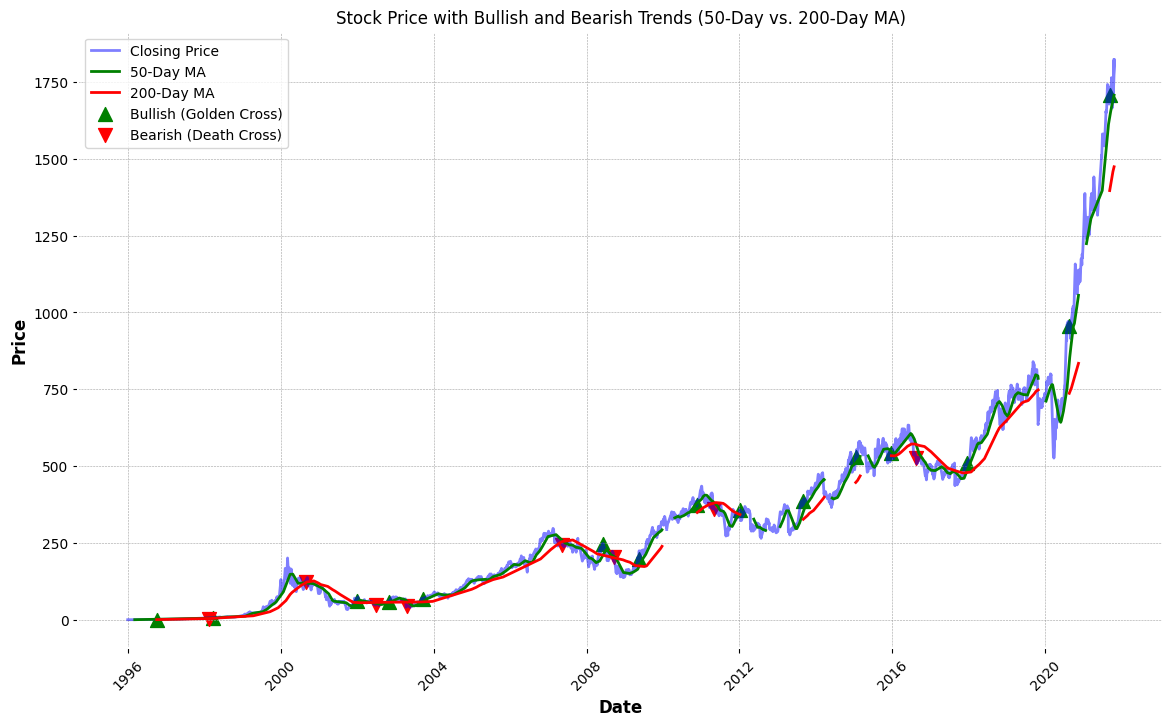

In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Step 2: Calculate the 50-day and 200-day moving averages
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200_MA'] = stock_data['Close'].rolling(window=200).mean()

# Step 3: Identify bullish and bearish trends
# Bullish: 50_MA crosses above 200_MA
# Bearish: 50_MA crosses below 200_MA
stock_data['Bullish'] = stock_data['50_MA'] > stock_data['200_MA']
stock_data['Bearish'] = stock_data['50_MA'] < stock_data['200_MA']

# Step 4: Create signals for trend change
# Find the points where bullish or bearish trend changes occur
stock_data['Trend_Change'] = stock_data['Bullish'].ne(stock_data['Bullish'].shift())

# Step 5: Plot the data
plt.figure(figsize=(14,8))

# Plot closing prices
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue', alpha=0.5)

# Plot the 50-day and 200-day moving averages
plt.plot(stock_data['Date'], stock_data['50_MA'], label='50-Day MA', color='green')
plt.plot(stock_data['Date'], stock_data['200_MA'], label='200-Day MA', color='red')

# Mark bullish and bearish points
bullish_crossings = stock_data[stock_data['Bullish'] & stock_data['Trend_Change']]
bearish_crossings = stock_data[stock_data['Bearish'] & stock_data['Trend_Change']]

# Mark bullish (golden cross) events
plt.scatter(bullish_crossings['Date'], bullish_crossings['Close'], marker='^', color='green', label='Bullish (Golden Cross)', s=100)

# Mark bearish (death cross) events
plt.scatter(bearish_crossings['Date'], bearish_crossings['Close'], marker='v', color='red', label='Bearish (Death Cross)', s=100)

# Add labels and title
plt.title('Stock Price with Bullish and Bearish Trends (50-Day vs. 200-Day MA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()